## Output has been removed from this notebook to reduce file sizes in the repo

In [1]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import pandana as pdna
import geopandas.io.osm as osm
%matplotlib inline

C:\Users\spm448\Anaconda\DLLs


## Download OpenStreetMap convenience stores for San Francisco proper

In [2]:
conven_gdf = osm.query_osm('node', 
                    bbox=[-122.539365,37.693047,-122.347698,37.816069],
                    tags='shop=convenience')
print len(conven_gdf)

142


In [3]:
conven_gdf = conven_gdf[conven_gdf.type == 'Point'].to_crs(epsg=3740)
print conven_gdf.geometry.head(3)
print len(conven_gdf)

0    POINT (549892.8880887975 4178032.872482732)
1    POINT (550479.8592901827 4178056.195002501)
2     POINT (553431.4228563724 4183274.96481794)
Name: geometry, dtype: object
142


In [4]:
x, y = zip(*[(p.x, p.y) for (i, p) 
             in conven_gdf.geometry.iteritems()])
x = pd.Series(x)
y = pd.Series(y)

## Get OpenStreetMap networks for Bay Area that I had previously - someday soon we'll have direct OSM import

In [5]:
store = pd.HDFStore('data/osm_bayarea.h5', "r")
nodes = store.nodes
edges = store.edges
print nodes.head(3)
print edges.head(3)

              x           y
8   629310.1250  4095536.75
9   629120.9375  4095816.75
10  628951.5625  4096090.50
   from  to      weight
6     8   9  338.255005
7     9  10  322.532990
8    10  11  218.505997


## Initialize and preprocess the network

In [28]:
del net

NameError: name 'net' is not defined

In [6]:
net=pdna.Network(nodes.x, 
                       nodes.y, 
                       edges["from"], 
                       edges.to, 
                       edges[["weight"]])
net.precompute(2000)

## Nearest *point-of-interest* queries

In [7]:
net.init_pois(num_categories=2, max_dist=2000, max_pois=50)

In [10]:
net.set_pois("conveniences", x, y)

In [20]:
S_rn_df = net.nearest_pois(2000, "conveniences", num_pois=20)
S_rn_df.columns[0]

1

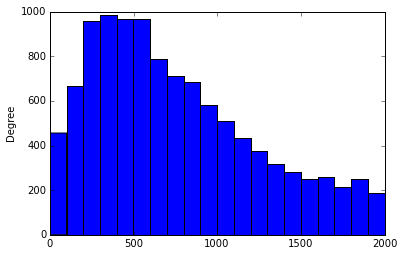

In [22]:
r_min_df = S_rn_df[S_rn_df.columns[0]]
r_min_df[r_min_df < 2000].plot(kind = 'hist', bins = 20)

In [15]:
node_ids = net.get_node_ids(x, y)

In [16]:
net.set(node_ids)

In [17]:
S_eff_df = net.aggregate(2000, type="sum", decay="flat")

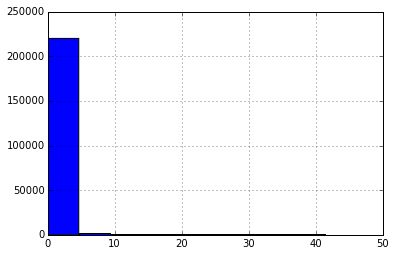

In [18]:
S_eff_df.hist()

In [19]:
S_eff_df1 = net.aggregate(2000, type="count", decay="flat") 

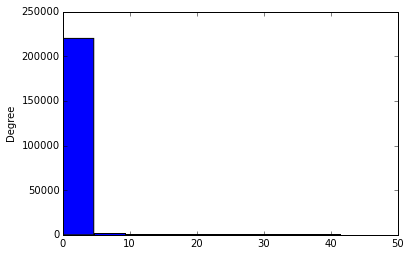

In [20]:
S_eff_df1.plot(kind='hist')

In [21]:
from shapely.geometry import Point
from fiona.crs import from_epsg
import geopandas as gpd
bbox=[-122.539365,37.693047,-122.347698,37.816069]
bbox = gpd.GeoSeries([Point(bbox[0], bbox[1]),
                      Point(bbox[2], bbox[3])], 
                     crs=from_epsg(4326))
bbox = bbox.to_crs(epsg=3740)
bbox = [bbox[0].x, bbox[0].y, bbox[1].x, bbox[1].y]

## Here's a map of the distance to the nearest restaurant

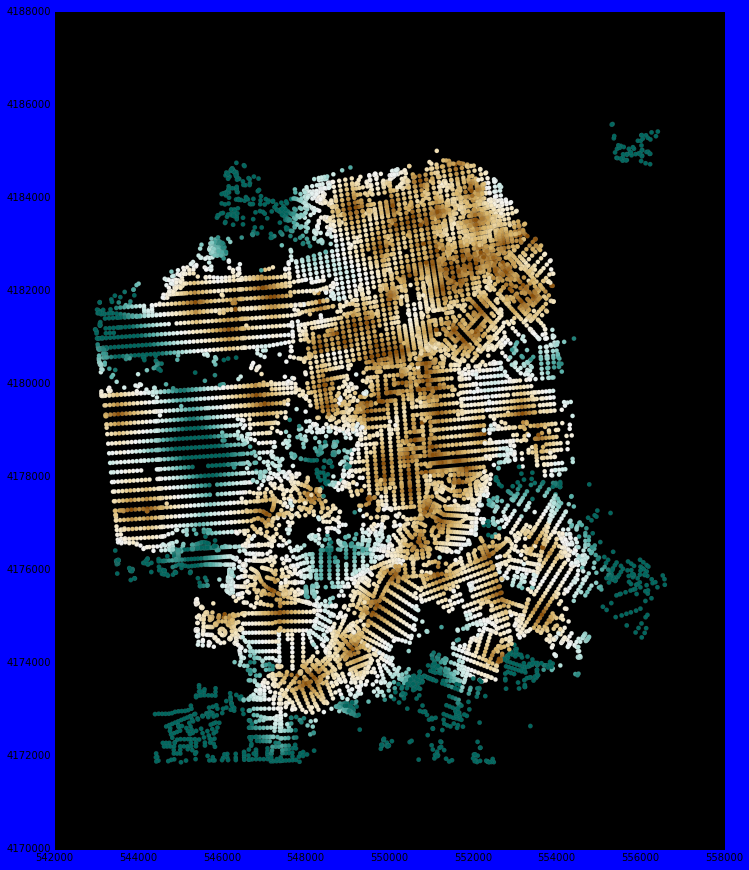

In [22]:
net.plot(r_min_df, bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 5th nearest restaurant

In [ ]:
net.plot(a[5], bbox=bbox, scheme="diverging", 
         color="BrBG")

## Here's a map of the distance to the 10th nearest restaurant

In [ ]:
net.plot(a[10], bbox=bbox, scheme="diverging", 
         color="BrBG")

# A similar workflow is used to do general network aggregations

## Relate the x-ys to nodes

## Assign the variable (in this case just location) to the network

## This is it - run the queries!

In [17]:
%time s = net.aggregate(500, type="sum", decay="linear")
%time t = net.aggregate(1000, type="sum", decay="linear")
%time u = net.aggregate(2000, type="sum", decay="linear")
%time v = net.aggregate(3000, type="sum", decay="linear")
%time w = net.aggregate(3000, type="count", decay="flat")

Wall time: 220 ms
Wall time: 258 ms
Wall time: 492 ms
Wall time: 13.2 s
Wall time: 13.2 s


In [ ]:
# Let's do some data analysis

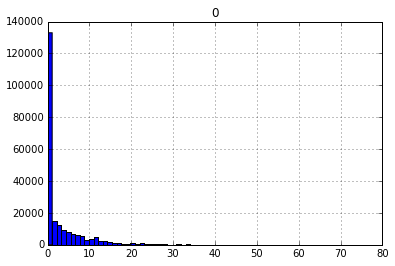

In [33]:
t_df = pd.DataFrame(w)
t_hist = t_df.hist(bins=70)

## Here's a map of access to restaurants with a 500m radius

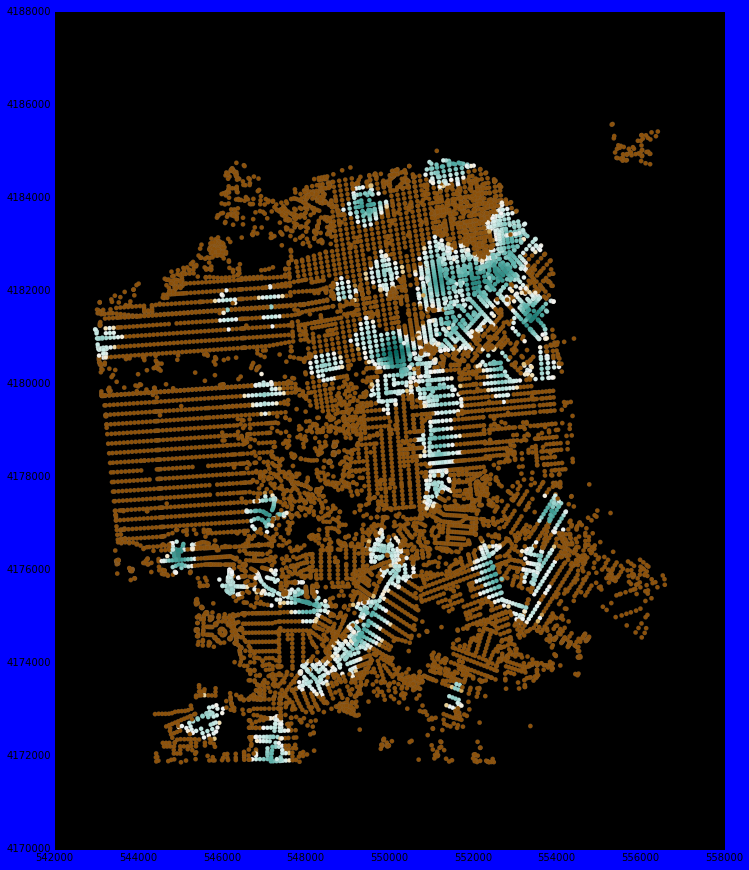

In [18]:
net.plot(s, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 1000 meters

In [ ]:
net.plot(t, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 2000 meters radius

In [ ]:
net.plot(u, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or 3000m radius

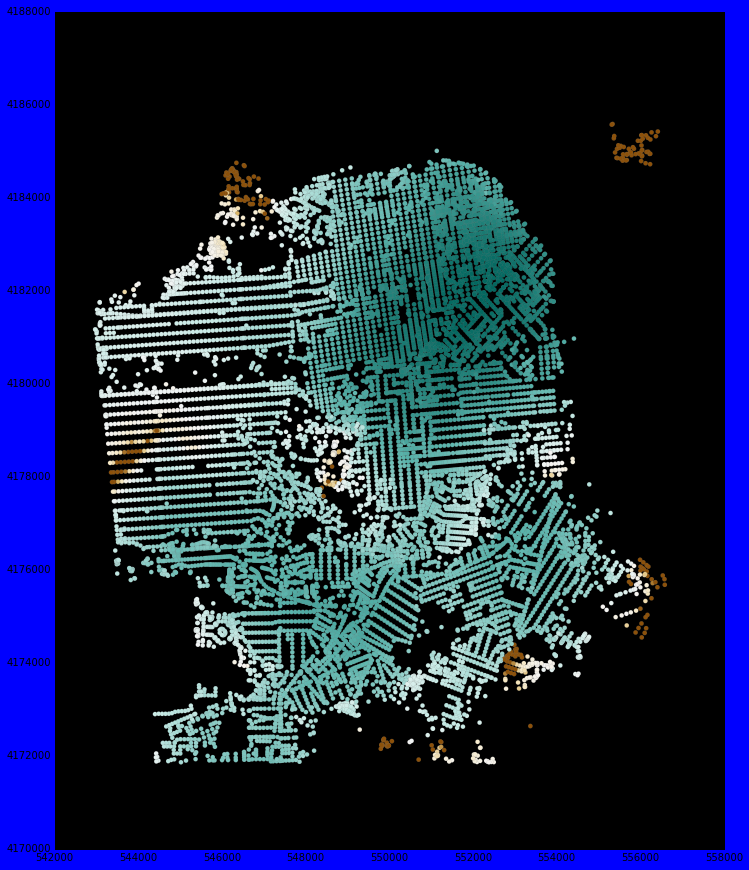

In [19]:
net.plot(v, bbox=bbox, scheme="diverging", 
         color="BrBG", log_scale=True)

## Or the whole Bay Area region - someone please help me with this visualization!

In [ ]:
net.plot(v, scheme="diverging", 
         color="BrBG", log_scale=True)